In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
def plot_confusion_matrix(cm,
                          classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalise:
    cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
    print('normalised confusion matrix')
  else:
    print('non-normalised confusion matrix')

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalise else 'd'
  thresh = cm.max()/2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.show()

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
K = len(set(y_train))
print(K)

10


In [5]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [8]:
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 206s 131ms/step - loss: 1.4166 - accuracy: 0.5067 - val_loss: 1.3290 - val_accuracy: 0.5361
Epoch 2/50
1562/1562 [==============================] - 212s 136ms/step - loss: 0.9915 - accuracy: 0.6537 - val_loss: 0.9099 - val_accuracy: 0.6952
Epoch 3/50
1562/1562 [==============================] - 217s 139ms/step - loss: 0.8428 - accuracy: 0.7088 - val_loss: 0.9280 - val_accuracy: 0.6877
Epoch 4/50
1562/1562 [==============================] - 214s 137ms/step - loss: 0.7543 - accuracy: 0.7398 - val_loss: 0.7764 - val_accuracy: 0.7481
Epoch 5/50
1562/1562 [==============================] - 218s 139ms/step - loss: 0.6857 - accuracy: 0.7669 - val_loss: 0.6502 - val_accuracy: 0.7786
Epoch 6/50
1562/1562 [==============================] - 215s 138ms/step - loss: 0.6333 - accuracy: 0.7847 - val_loss: 0.6708 - val_accuracy: 0.7876
Epoch 7/50
1562/1562 [==============================] - 215s 137ms/step - loss: 0.5944 - accuracy: 0.7990 - val_

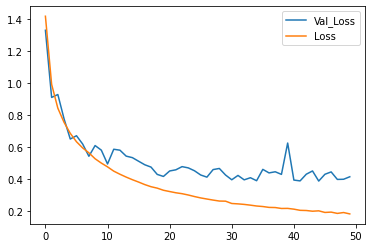

In [9]:
plt.plot(r.history['val_loss'],label = 'Val_Loss')
plt.plot(r.history['loss'],label = 'Loss')
plt.legend()

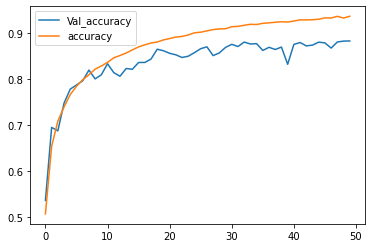

In [10]:
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.legend()

In [13]:
predictions = model.predict(x_test).argmax(axis=1)

In [14]:
cm = confusion_matrix(y_test,predictions)

non-normalised confusion matrix


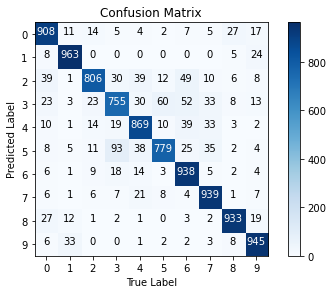

In [15]:
plot_confusion_matrix(cm,list(range(10)))

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [17]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: horse Predicted: airplane')

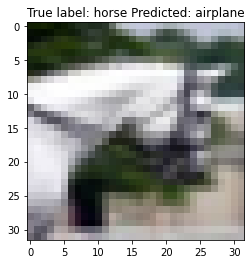

In [23]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]))